In [ ]:
! pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import zipfile
with zipfile.ZipFile("aligned.zip", 'r') as zip_ref:
    zip_ref.extractall("./aligned")

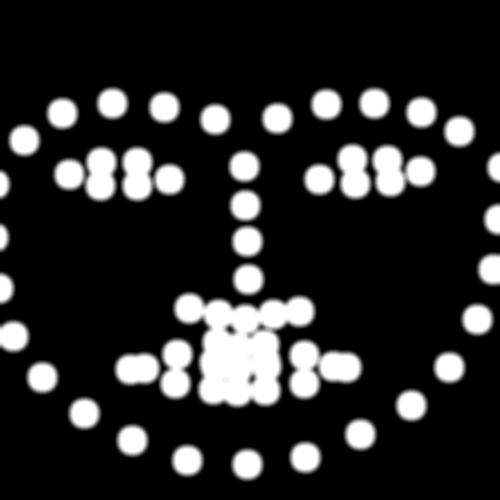

-1

In [42]:
# import required libraries

from imutils import face_utils
from google.colab.patches import cv2_imshow
import numpy as np

import argparse

import imutils

import dlib

import cv2

ap = argparse.ArgumentParser()

# –-image is a path to the input image

ap.add_argument("-p", "-shape-predictor", required=True, help="path to facial landmark predictor")
ap.add_argument("-i", "-image", required=True, help="path to input image")

args ={
  "shape_predictor": "pred.dat",
  "image": "./aligned/test_0001_aligned.jpg"
}



# Exemple

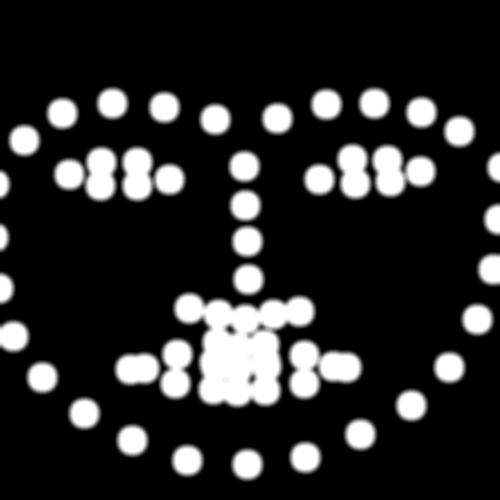

-1

In [43]:
# initialize built-in face detector in dlib

detector = dlib.get_frontal_face_detector()

# initialize face landmark predictor

predictor = dlib.shape_predictor(args["shape_predictor"])

# load input image, resize it, and convert it to grayscale

image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image

rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
  # convert the facial landmark (x, y)-coordinates to a NumPy
  # array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)

  # convert dlib's rectangle to a OpenCV-style bounding box
  (x, y, w, h) = face_utils.rect_to_bb(rect)
  cv2.rectangle(image, (0,0), (500,500), (0,0,0), -1)
  # loop over the (x, y)-coordinates for the facial landmarks
  # and draw them on the image
  for (x, y) in shape:
    cv2.circle(image, (x, y), 15, (255, 255, 255), -1)
  
  Gaussian = cv2.GaussianBlur(image, (7, 7), sigmaX=3, sigmaY=3)
  

# show the output image with the face detections + facial landmarks
cv2_imshow(Gaussian)
cv2.waitKey(0)

In [48]:
import os
path = "./aligned"
dir_list = os.listdir(path)
for f in dir_list:

  image = cv2.imread("./aligned/" + f)
  image = imutils.resize(image, width=500)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # detect faces in the grayscale image

  rects = detector(gray, 1)

  for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # convert dlib's rectangle to a OpenCV-style bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (0,0), (500,500), (0,0,0), -1)
    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    for (x, y) in shape:
      cv2.circle(image, (x, y), 15, (255, 255, 255), -1)
    
    Gaussian = cv2.GaussianBlur(image, (7, 7), sigmaX=3, sigmaY=3)
    

  # show the output image with the face detections + facial landmarks
  Gaussian = imutils.resize(Gaussian, width=100)
  cv2.imwrite("./landmark/" + f, Gaussian)

In [49]:
import os
import zipfile
    
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))

with zipfile.ZipFile('landmark.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipdir('./landmark/', zipf)

In [50]:
dir_path = "./landmark"
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))
dir_path = "./aligned"
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

15339
15339
